In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from utils_analysis import prepare_scores

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/mila/f/floresl/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/mila/f/floresl/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/mila/f/floresl/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# CNN with BART

In [2]:
metric = "rougeL"
test_filepath = "/home/mila/f/floresl/beam-search/data/cnn/test.csv"
scores_filepath = "/home/mila/f/floresl/beam-search/results/final/bart-base_data_cnn_checkpoint-200_cnn.json"
temperature = 0.001

df_test = pd.read_csv(test_filepath)
df_test["target"] = df_test["target"].fillna("")

targets = [str(s) for s in df_test["target"]]  # type: ignore

results = prepare_scores(scores_filepath, scores_filepath, targets, targets, metric, temperature)  # type: ignore

/home/mila/f/floresl/beam-search/analysis/utils_analysis.py:49: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  abs(spearmanr(ground_truth_score, confidence_score_dict[str(k)]).statistic)  # type: ignore


In [3]:
scores_dataframe = results.scores_dataframe
scores_dataframe["targets"] = targets
scores_dataframe["source"] = df_test["source"]

Text(0, 0.5, 'rougeL')

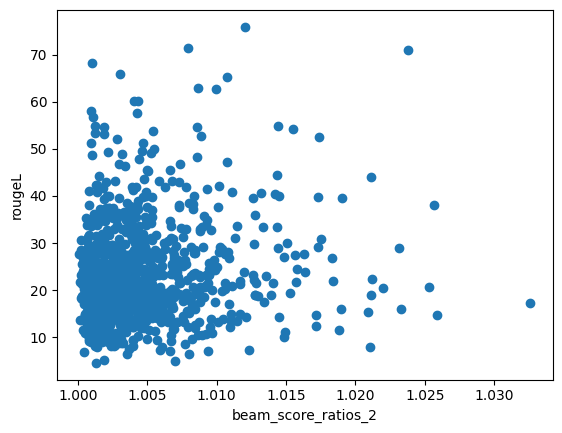

In [4]:
plt.scatter(scores_dataframe["beam_score_ratios_2"], scores_dataframe["rougeL"])
plt.xlabel("beam_score_ratios_2")
plt.ylabel("rougeL")

In [5]:
for i, row in scores_dataframe.loc[
    (scores_dataframe["beam_score_ratios_2"] >= 1.020)
    & (scores_dataframe["rougeL"] <= 30),
    ["sentences", "targets", "source"],
].iterrows():
    print("SOURCE:")
    print("\n".join(row["source"].split(".")))
    print()
    print("PREDICTION:")
    print(row["sentences"])
    print()
    print("TARGET:")
    print(row["targets"])
    print()

SOURCE:
A Transportation Security Administration agent who was fired in Nashville after becoming obsessed with a coworker - following her, taking videos and photos and breaking into her house five times - was jailed this week as a result of the stalking case
 Daniel Boykin, 33, plead guilty to charges of unlawful photography, aggravated burglary, wiretapping, unlawful telephone recording and two computer crimes
 In apologizing for his actions in court Thursday, Boykin admitted to repeatedly filming the woman inside a bathroom at Nashville International Airport and was subsequently sentenced to six months prison
 At the time of his arrest last year, Boykin was found with 92 videos of the victim — 29 taken from the airport bathroom — and 1,527 photographs
 Investigators found additional images taken inside the woman's home of air vents and shelves in the bathroom, which they believe suggested he intended to plant hidden cameras at some point
 Obsessed: Daniel Boykin, 33, a former TSA emp

In [ ]:
for i, row in scores_dataframe.loc[
    (scores_dataframe["beam_score_ratios_2"] <= 1.005)
    & (scores_dataframe["rougeL"] >= 50),
    ["sentences", "targets", "source"],
].iterrows():
    print("SOURCE:")
    print("\n".join(row["source"].split(".")))
    print()
    print("PREDICTION:")
    print(row["sentences"])
    print()
    print("TARGET:")
    print(row["targets"])
    print()

SOURCE:
An exotic animal owner from Ohio is campaigning for his bear and big cats to be returned after they were seized by the state in January
 In total, six tigers, a bear, a lion, a cougar, a black leopard and a liger (part lion, part tiger) were taken from Kenny Hetrick's Stony Ridge farm after it was found he did not have the correct permit and cages were 'unsafe'
 Authorities have also started cracking down on the owners of  wild creatures following an incident in 2011 where a man in eastern Ohio released 56 exotic animals - including lions and  tigers - then killed himself
 Apparently Hetrick has been heartbroken by the clampdown on his farm and the 72-year-old widower is now fighting to overturn the seizure, backed by neighbors who insist his menagerie doesn't pose a threat
 Scroll down for video 
 Feeling lost: Kenny Hetrick is campaigning for his tigers, leopards and bears to be returned after they were seized by the state in January 
 They have organized car washes and hande

# FLORES with Flan-T5

In [8]:
metric = "bleu"
test_filepath = "/home/mila/f/floresl/beam-search/data/flores/test.csv"
scores_filepath = "/home/mila/f/floresl/beam-search/results/final/flan-t5-base_data_flores_checkpoint-260_flores.json"
temperature = 1.000

df_test = pd.read_csv(test_filepath)
df_test["target"] = df_test["target"].fillna("")

targets = [str(s) for s in df_test["target"]]  # type: ignore

results = prepare_scores(scores_filepath, targets, metric, temperature)  # type: ignore

float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero


/home/mila/f/floresl/beam-search/analysis/utils_analysis.py:49: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  abs(spearmanr(ground_truth_score, confidence_score_dict[str(k)]).statistic)  # type: ignore


In [9]:
scores_dataframe = results.scores_dataframe
scores_dataframe["targets"] = targets
scores_dataframe["source"] = df_test["source"]

Text(0, 0.5, 'bleu')

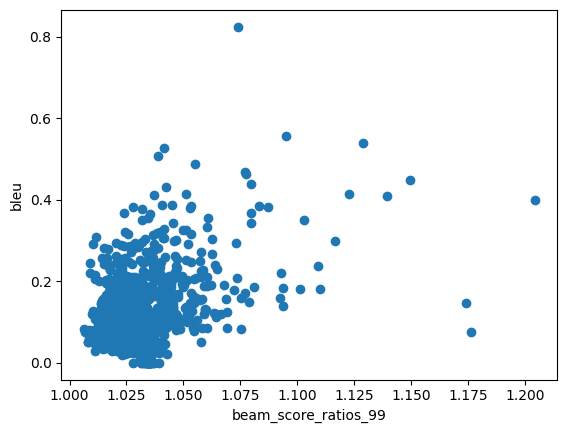

In [11]:
plt.scatter(scores_dataframe["beam_score_ratios_99"], scores_dataframe["bleu"])
plt.xlabel("beam_score_ratios_99")
plt.ylabel("bleu")

In [12]:
for i, row in scores_dataframe.loc[
    (scores_dataframe["beam_score_ratios_99"] >= 1.170)
    & (scores_dataframe["bleu"] <= 0.6),
    ["sentences", "targets", "source"],
].iterrows():
    print("SOURCE:")
    print("\n".join(row["source"].split(".")))
    print()
    print("PREDICTION:")
    print(row["sentences"])
    print()
    print("TARGET:")
    print(row["targets"])
    print()

SOURCE:
Translate English to Filipino: The surface of the Moon is made of rocks and dust
 The outer layer of the Moon is called the crust


PREDICTION:
The surface of the Moon is made of rocks and dust. The outer layer of the Moon is called the crust.

TARGET:
Ang ibabaw ng Buwan ay gawa sa mga bato at alikabok. Ang panlabas na suson ng Buwan ay tinatawag na crust.

SOURCE:
Translate English to Filipino: In the archipelagos and lakes you do not necessarily need a yacht


PREDICTION:
Ang mga archipelago at mga lupa ay hindi nangangailangan ng isang yacht.

TARGET:
Sa mga arkipelago at mga lawa ay hindi mo naman palaging kakailanganin ang yate.

SOURCE:
Translate English to Filipino: Scotturb Bus 403 travels regularly to Sintra, stopping at Cabo da Roca


PREDICTION:
Ang Scotturb Bus 403 ay nagsimula sa Sintra, na nagsimula sa Cabo da Roca.

TARGET:
Regular na bumibiyahe ang Scotturb Bus 403 patungong Sintra, tumitigil sa Cabo da Roca.

